#### Import Neccessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import json
%matplotlib inline
pd.set_option('display.max_colwidth', None)

#### About Data

The <b> Health </b> dataset includes related indicators for each region.

#### Schema

**smoking_prevalence** - Percentage of smokers in population

**diabetes_prevalence** - Percentage of persons with diabetes in population

**infant_mortality_rate** - Infant mortality rate (per 1,000 live births)

**adult_male_mortality_rate** - Mortality rate, adult, male (per 1,000 male adults)

**adult_female_mortality_rate** - Mortality rate, adult, female (per 1,000 male adults)

**pollution_mortality_rate** - Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)

**comorbidity_mortality_rate** - Mortality from cardiovascular disease, cancer, diabetes or cardiorespiratory disease between exact ages 30 and 70

**hospital_beds** - Hospital beds (per 1,000 people)

**nurses** - Nurses and midwives (per 1,000 people)

**physicians** - Physicians (per 1,000 people)

**health_expenditure** - Health expenditure per capita

**out_of_pocket_health_expenditure** - Out-of-pocket health expenditure per capita


#### Read Data

To prevent Pandas from recognizing the string "NA" (which represents the country Namibia) as a null value, set the argument *keep_default_na* to False and pass a list of values to be interpreted as null (which excludes "NA") to *na_values* when reading the CSV file.

In [5]:
health = pd.read_json('health.json',orient='split')
health

,location_key,life_expectancy,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd
0,AD,NaN,33.5,7.7,2.7,NaN,NaN,NaN,NaN,NaN,4.0128,3.3333,4040.786621,1688.121460
1,AE,77.814,28.9,16.3,6.5,69.555,44.863,54.7,16.8,NaN,5.7271,2.5278,1357.017456,256.034485
2,AF,64.486,NaN,9.2,47.9,237.554,192.532,211.1,29.8,0.5,0.1755,0.2782,67.122650,50.665913
3,AG,76.885,NaN,13.1,5.0,126.917,83.136,29.9,22.6,NaN,4.5171,2.9560,673.859680,235.749039
4,AL,78.900,28.7,9.0,7.8,93.315,49.486,68.0,17.0,NaN,3.6495,1.2164,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,WS,73.187,27.7,9.2,13.6,138.239,80.735,85.0,20.6,NaN,2.4885,0.3445,233.065063,27.634661
3500,YE,66.096,18.4,5.4,42.9,219.749,174.558,194.2,30.6,NaN,0.7852,NaN,72.039467,58.321163
3501,ZA,63.857,20.3,12.7,28.5,376.404,248.816,86.7,26.2,NaN,1.3078,0.9054,499.237549,38.775391
3502,ZM,63.510,13.8,4.5,40.4,321.143,221.573,127.2,17.9,NaN,1.3376,1.1867,67.648666,8.015779


#### Prepare Data

In [9]:
health = health.drop(['life_expectancy'], axis=1)

In [10]:
health = health[health['location_key'].str.contains("_") == False].reset_index(drop=True)
health.head()

,location_key,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd
0,AD,33.5,7.7,2.7,NaN,NaN,NaN,NaN,NaN,4.0128,3.3333,4040.786621,1688.121460
1,AE,28.9,16.3,6.5,69.555,44.863,54.7,16.8,NaN,5.7271,2.5278,1357.017456,256.034485
2,AF,NaN,9.2,47.9,237.554,192.532,211.1,29.8,0.5,0.1755,0.2782,67.122650,50.665913
3,AG,NaN,13.1,5.0,126.917,83.136,29.9,22.6,NaN,4.5171,2.9560,673.859680,235.749039
4,AL,28.7,9.0,7.8,93.315,49.486,68.0,17.0,NaN,3.6495,1.2164,NaN,NaN


#### Data Info

In [11]:
health.shape #size of dataset

(210, 13)

In [12]:
health.columns #column names

Index(['location_key', 'smoking_prevalence', 'diabetes_prevalence',
       'infant_mortality_rate', 'adult_male_mortality_rate',
       'adult_female_mortality_rate', 'pollution_mortality_rate',
       'comorbidity_mortality_rate', 'hospital_beds_per_1000',
       'nurses_per_1000', 'physicians_per_1000', 'health_expenditure_usd',
       'out_of_pocket_health_expenditure_usd'],
      dtype='object')

The health dataset has 210 rows and 13 columns.

#### Check Data Types

In [13]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   location_key                          210 non-null    object 
 1   smoking_prevalence                    146 non-null    float64
 2   diabetes_prevalence                   209 non-null    float64
 3   infant_mortality_rate                 193 non-null    float64
 4   adult_male_mortality_rate             189 non-null    float64
 5   adult_female_mortality_rate           189 non-null    float64
 6   pollution_mortality_rate              183 non-null    float64
 7   comorbidity_mortality_rate            183 non-null    float64
 8   hospital_beds_per_1000                25 non-null     float64
 9   nurses_per_1000                       180 non-null    float64
 10  physicians_per_1000                   164 non-null    float64
 11  health_expenditure_

column "location_key" is an object but it should be converted to a string.

In [14]:
health['location_key'] = health['location_key'].astype("string")

In [15]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   location_key                          210 non-null    string 
 1   smoking_prevalence                    146 non-null    float64
 2   diabetes_prevalence                   209 non-null    float64
 3   infant_mortality_rate                 193 non-null    float64
 4   adult_male_mortality_rate             189 non-null    float64
 5   adult_female_mortality_rate           189 non-null    float64
 6   pollution_mortality_rate              183 non-null    float64
 7   comorbidity_mortality_rate            183 non-null    float64
 8   hospital_beds_per_1000                25 non-null     float64
 9   nurses_per_1000                       180 non-null    float64
 10  physicians_per_1000                   164 non-null    float64
 11  health_expenditure_

#### Check for Missing Values

In [16]:
missing_values = health.isnull().sum()
missing_values

location_key                              0
smoking_prevalence                       64
diabetes_prevalence                       1
infant_mortality_rate                    17
adult_male_mortality_rate                21
adult_female_mortality_rate              21
pollution_mortality_rate                 27
comorbidity_mortality_rate               27
hospital_beds_per_1000                  185
nurses_per_1000                          30
physicians_per_1000                      46
health_expenditure_usd                   24
out_of_pocket_health_expenditure_usd     24
dtype: int64

Except for location_key, other columns have missing values ranging from 1 to 185.

#### Check for Outliers

In [17]:
health.describe().applymap("{0:.2f}".format)

,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd
count,146.00,209.00,193.00,189.00,189.00,183.00,183.00,25.00,180.00,164.00,186.00,186.00
mean,21.63,8.36,21.38,185.24,122.43,92.21,18.88,3.03,4.39,1.92,1081.07,228.80
std,9.72,4.73,19.43,92.39,81.75,71.93,5.60,2.57,4.13,1.65,1781.60,341.82
min,2.00,1.00,1.40,41.50,24.49,7.00,7.80,0.30,0.07,0.01,19.43,0.19
25%,14.00,5.40,6.10,110.63,61.84,33.75,14.85,1.20,1.31,0.41,82.36,27.56
50%,21.80,6.90,14.00,177.54,95.58,68.60,18.80,2.30,3.07,1.58,335.95,92.76
75%,27.98,10.70,32.70,237.55,174.97,147.00,22.90,4.40,6.32,2.99,1110.92,259.47
max,47.00,30.50,84.50,545.67,419.36,324.10,30.60,11.50,19.46,8.42,10246.14,2882.04


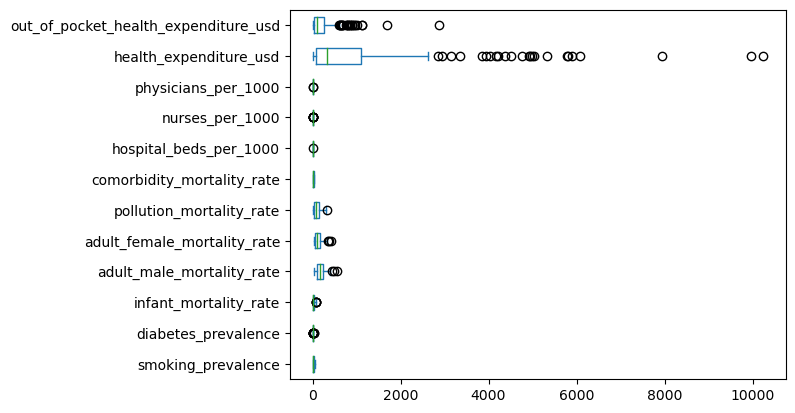

In [18]:
health.plot.box(vert=False)
plt.show()

#### Checking for Duplicates

In [19]:
health[health.duplicated()]

,location_key,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd
